<a href="https://colab.research.google.com/github/HeberthDCM/Recuperacion_Datos/blob/main/Devoluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# data manipulation
import pandas as pd
import seaborn as sb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statistics import geometric_mean


In [79]:
devoluciones = pd.read_excel("DATA_2023.xls") #en tu caso es un excel
#devoluciones = pd.read_csv("/DATA_2024.csv")


In [80]:
devoluciones.head(10)

,FECHA,AD,NUMERO,CODIGO_PRODUCTO,PRODUCTO,UND,KG,PRECIO,ZONA,COD_VENDEDOR,VENDEDOR,CODIGO_REPARTIDOR,REPARTIDOR,CODIGO_MOTIVO,DESTINO,OBSERVACION,MOTIVO,CODIGO_CLIENTE,CLIENTE
0,2023-01-02,14,84010.0,5535,CH LOMO C/L MARIP 7-11MM 170-300 10U,10,2.30,27.14,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,desposte,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
1,2023-01-02,14,84009.0,2124,POLLO FRESCO ENTERO 2.0 - 2.2,36,74.52,439.668,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,beneficio,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
2,2023-01-02,14,84009.0,2125,POLLO FRESCO ENTERO 2.2 - 2.4,18,41.50,244.85,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,beneficio,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
3,2023-01-02,14,84009.0,4117,HIGADO DE POLLO FRESCO,0,5.20,15.6,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,harinas,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
4,2023-01-02,14,84009.0,6137,R PERRO CALIENTE X900R 24 UND,1,0.90,0,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,despacho,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
5,2023-01-02,14,84009.0,7226,R HAMB PECH POLLO BOL 16U X960 CONG,1,0.96,14,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,harinas,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
6,2023-01-02,14,84009.0,44108,RC CHORIZO PREC PARR CERDO X 0.83KG 10UN,1,0.83,8.3,zona 20,76.0,ZAPATA ECHEVARRIA LUIS CESAR,188.0,juan sanchez,16.0,despacho,NaN,Error de Pedido,303,ZEA DE MEDINA NANCY
7,2023-01-02,14,446435.0,2150,POLLO FRESCO ENTERO 2.8 - 3.0,4,11.21,66.139,zona 60,46.0,MOSCOSO CARPIO CARLOS ALBERTO,77.0,jose alvarez,1.0,beneficio,NaN,Local cerrado,7934,YUJRA LLAMOCCA CESAR
8,2023-01-02,14,91535.0,3130,PIERNITAS DE POLLO FRESC GRANEL90-150gr,0,16.55,135.71,zona 51,227.0,PERCY IGUERETA,208.0,diego pauca,12.0,trozado,NaN,Fuera de Especificaciones,23209,DESCONOCIDO 1
9,2023-01-02,14,436430.0,2125,POLLO FRESCO ENTERO 2.2 - 2.4,1,2.80,16.52,zona 50,11.0,OBANDO CHAVEZ JAIME ALFREDO,248.0,Jose Nuñoncca,20.0,harinas,NaN,Aspectos sanitarios,10179,CHOQUEPUMA HERMOZA MARIA


In [81]:
devoluciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17035 entries, 0 to 17034
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FECHA              17035 non-null  datetime64[ns]
 1   AD                 17035 non-null  object        
 2   NUMERO             16232 non-null  float64       
 3   CODIGO_PRODUCTO    17035 non-null  int64         
 4   PRODUCTO           17035 non-null  object        
 5   UND                17028 non-null  object        
 6   KG                 17021 non-null  float64       
 7   PRECIO             16856 non-null  object        
 8   ZONA               16234 non-null  object        
 9   COD_VENDEDOR       16213 non-null  float64       
 10  VENDEDOR           15549 non-null  object        
 11  CODIGO_REPARTIDOR  16190 non-null  float64       
 12  REPARTIDOR         15557 non-null  object        
 13  CODIGO_MOTIVO      17004 non-null  float64       
 14  DESTIN

In [82]:
# Se trabaja con datos numéricos, esta columna traerá problemas por lo que será necesario transformarla
devoluciones['ZONA'].value_counts()

ZONA
embutidos        7451
Institucional    2510
zona 10           973
zona 40           798
zona 80           745
                 ... 
zona 45             1
zona 44             1
zona 43             1
trozado             1
ZONA 70             1
Name: count, Length: 67, dtype: int64

In [83]:
# nos puestra datos interesantes de cada columna del set de datos
devoluciones.describe()

,FECHA,NUMERO,CODIGO_PRODUCTO,KG,COD_VENDEDOR,CODIGO_REPARTIDOR,CODIGO_MOTIVO
count,17035,1.623200e+04,17035.000000,17021.000000,16213.000000,16190.000000,17004.000000
mean,2023-07-09 20:12:06.128558848,4.371685e+05,13537.921338,7.840760,130.428607,154.227486,7.253352
min,2023-01-02 00:00:00,3.246000e+03,2112.000000,0.000000,0.000000,0.000000,1.000000
25%,2023-04-09 00:00:00,4.647448e+05,5535.000000,0.600000,46.000000,72.000000,1.000000
50%,2023-07-13 00:00:00,4.971550e+05,6551.000000,1.250000,164.000000,190.000000,2.000000
75%,2023-10-13 00:00:00,5.384552e+05,13139.000000,4.000000,214.000000,224.000000,16.000000
max,2023-12-31 00:00:00,4.708414e+06,45106.000000,1760.000000,277.000000,1218.000000,25.000000
std,NaN,1.768298e+05,13835.523418,34.868321,86.659757,82.603294,6.677472


array([[<Axes: title={'center': 'FECHA'}>,
        <Axes: title={'center': 'NUMERO'}>,
        <Axes: title={'center': 'CODIGO_PRODUCTO'}>],
       [<Axes: title={'center': 'KG'}>,
        <Axes: title={'center': 'COD_VENDEDOR'}>,
        <Axes: title={'center': 'CODIGO_REPARTIDOR'}>],
       [<Axes: title={'center': 'CODIGO_MOTIVO'}>, <Axes: >, <Axes: >]],
      dtype=object)

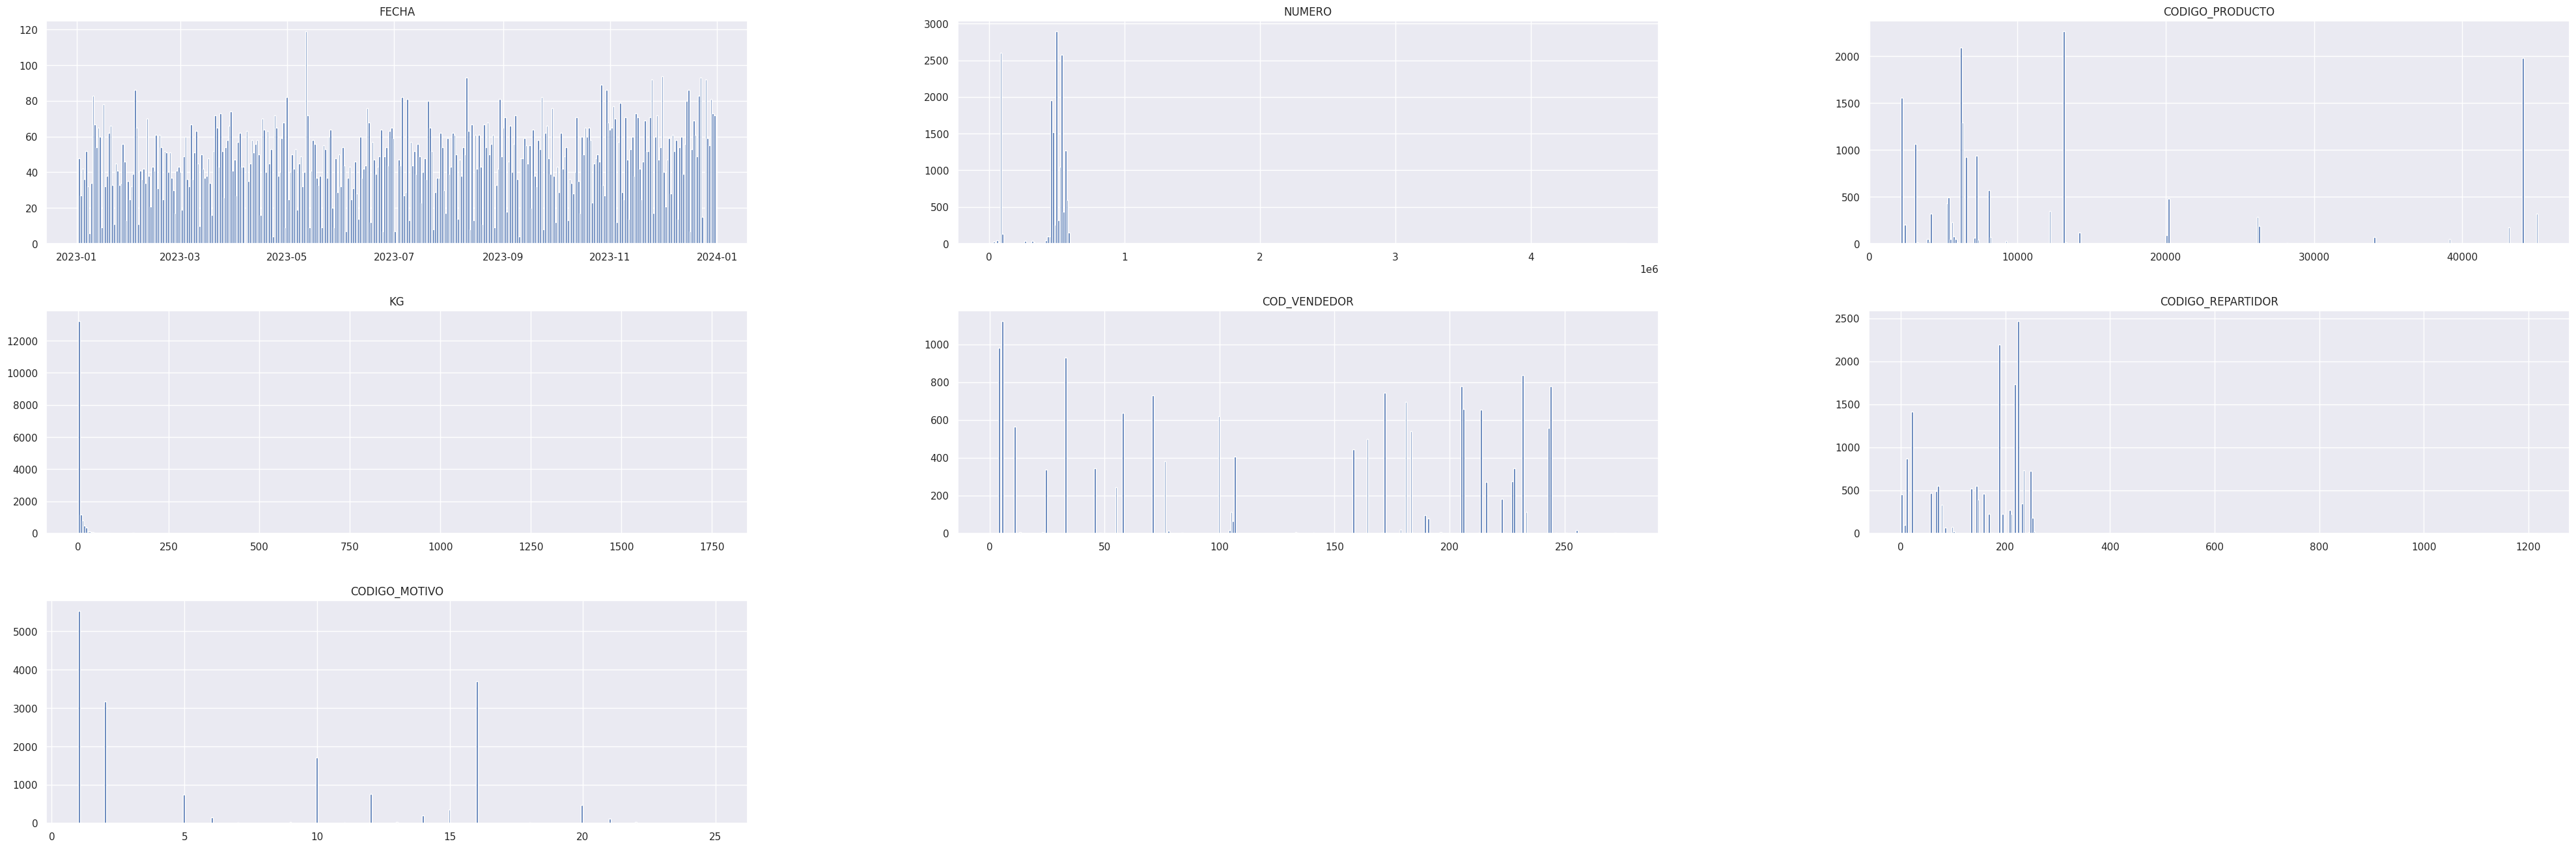

In [84]:
#Histogramas
devoluciones.hist(figsize=(50,16),bins=365)
#devoluciones.hist(figsize=(15,8),bins=30,edgecolor = 'red')

In [85]:
# quitar datos vacios
# muestar un set sin datos vacios
datos_na = devoluciones.dropna()
# quita los vacios y los pone en datos, osea reescribe
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 1278 to 16959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FECHA              116 non-null    datetime64[ns]
 1   AD                 116 non-null    object        
 2   NUMERO             116 non-null    float64       
 3   CODIGO_PRODUCTO    116 non-null    int64         
 4   PRODUCTO           116 non-null    object        
 5   UND                116 non-null    object        
 6   KG                 116 non-null    float64       
 7   PRECIO             116 non-null    object        
 8   ZONA               116 non-null    object        
 9   COD_VENDEDOR       116 non-null    float64       
 10  VENDEDOR           116 non-null    object        
 11  CODIGO_REPARTIDOR  116 non-null    float64       
 12  REPARTIDOR         116 non-null    object        
 13  CODIGO_MOTIVO      116 non-null    float64       
 14  DESTINO   

<Axes: >

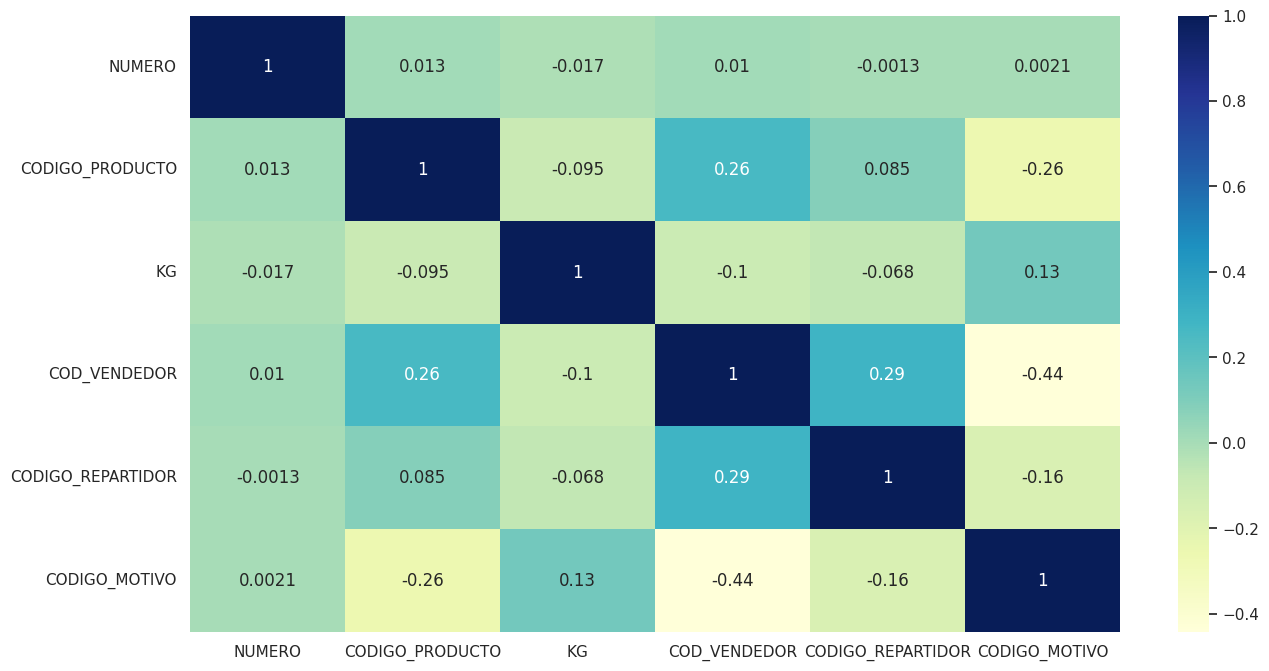

In [86]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(devoluciones.corr(numeric_only=True), annot= True, cmap='YlGnBu')
#este grafico muestra como el movimiento de una caracteristica influye en otra caracteristica

## TRABAJO CON DATOS

In [87]:
# cambiar caracteristica categoria a numerica
# Cercania al oceano
datos_na['ZONA'].value_counts()
# si ponemos a <1h ocena = 1, inland=2, near ocean=3, near bay=4 y island = 5
# al analñizar los puede categorizar cuando los aprenda
# para eso se usan Dummies / one-hot encoding
# 1h ocean  inland  near_ocean  near_bay    island
#   1       0       0           0           0
#   0       0       0           1           0
#   0       0       1           0           0
#pd.get_dummies(datos_na['ocean_proximity'])
#dummies_ZONA=pd.get_dummies(datos_na['ZONA'], dtype=int,drop_first=Truerue) # fuerzo a que me devuelva un dato entero y no boolean
dummies_ZONA=pd.get_dummies(datos_na.ZONA,drop_first=False, dtype=int) # fuerzo a que me devuelva un dato entero y no boolean
dummies_ZONA

,Institucional,ZONA 21,embutidos,zona 10,zona 16,zona 17,zona 20,zona 30,zona 40,zona 41,zona 50,zona 51,zona 60,zona 70,zona 80,zona 90
1278,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2070,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2071,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16947,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16948,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16949,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
from pickle import FALSE
# cambiar caracteristica categoria a numerica
datos_na['VENDEDOR'].value_counts()
dummies_VENDEDOR=pd.get_dummies(datos_na.VENDEDOR, dtype=int,drop_first = FALSE) # fuerzo a que me devuelva un dato entero y no boolean
dummies_VENDEDOR

,ANGHELO FLORES,BALDARRAGO SUMA JORGE LUIS,CHAVEZ SIU ERIKA FRANCIS,CHOQUE SANCA FEDERICK,COLLAHUA CALA JOHN GIUSSEPE,HERRERA MOTTA DUILIO ALEXIS,HUANCA SUCA ALEX LUIS,Karen Vega,MOSCOSO CARPIO CARLOS ALBERTO,OBANDO CHAVEZ JAIME ALFREDO,PAREDES PAREDES MARIELA,PERCY IGUERETA,RODRIGUEZ ENRIQUEZ WILLIAN SALVADOR,SANCHEZ ORTEGA JUAN,TICONA MAMANI RONALD ALONSO,TORRES MANSILLA JEAN RENE,ZAPATA ECHEVARRIA LUIS CESAR
1278,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2070,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2071,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16947,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16948,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16949,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# cambiar caracteristica categoria a numerica
datos_na['REPARTIDOR'].value_counts()
dummies_REPARTIDOR=pd.get_dummies(datos_na.REPARTIDOR, dtype=int,drop_first=FALSE) # fuerzo a que me devuelva un dato entero y no boolean
dummies_REPARTIDOR

,Fredy Machaca,Henry Sayco,Hugo Yauri,Jesus Arana,Jimmy Luna Morales,Jose Nuñoncca,Junior Chalco,Marco Winder,Miguel Lempe,Victor Begazo,...,felipe guevara,guido palomino,harry guzman,isac mango,jheyson montes,jose alvarez,jose calcina,juan sanchez,paul rondon,valerio ramos
1278,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
# cambiar caracteristica categoria a numerica
datos_na['DESTINO'].value_counts()
dummies_DESTINO=pd.get_dummies(datos_na.DESTINO, dtype=int, drop_first=False)# fuerzo a que me devuelva un dato entero y no boolean
dummies_DESTINO

,beneficio,deshuesado,despacho,desposte,embutidos,harinas,trozado
1278,0,0,1,0,0,0,0
1495,0,0,1,0,0,0,0
2070,0,0,0,0,0,1,0
2071,0,0,0,0,0,1,0
2072,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
16903,0,0,0,0,0,1,0
16947,0,0,0,0,0,0,1
16948,0,0,0,0,0,0,1
16949,0,0,0,1,0,0,0


In [91]:
# cambiar caracteristica categoria a numerica
datos_na['MOTIVO'].value_counts()
dummies_MOTIVO=pd.get_dummies(datos_na.MOTIVO, dtype=int,drop_first=False) # fuerzo a que me devuelva un dato entero y no boolean
dummies_MOTIVO

,Aspectos sanitarios,Defectos de Produccion,Defectos de empaque,Error de Pedido,Error de despacho,Fuera de Especificaciones,"Golpeado, moreteado y quiñado",Local cerrado,Particulas Extrañas,Perdida de vacio,Sin dinero
1278,0,0,0,0,1,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,1,0,0,0
2070,0,0,0,0,0,1,0,0,0,0,0
2071,0,0,0,0,0,1,0,0,0,0,0
2072,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16903,0,0,0,0,0,1,0,0,0,0,0
16947,0,0,0,0,0,0,0,1,0,0,0
16948,0,0,0,0,0,0,0,1,0,0,0
16949,0,0,0,0,0,0,0,1,0,0,0


In [92]:
# cambiar caracteristica categoria a numerica
datos_na['CLIENTE'].value_counts()
dummies_CLIENTE=pd.get_dummies(datos_na.CLIENTE, dtype=int,drop_first=False) # fuerzo a que me devuelva un dato entero y no boolean
dummies_CLIENTE

,. CHEN WEI,ADRIANA AGRAMONTE CATERING S.A.C.,AMANQUI VELASQUEZ TEOFILO,BARRIGA HUARACCALLO BONIFACIO,CARPIO ARROYO YESSICA,CARRASCO CASTRO SONIA,CASTRO CATALAN SATURNINA,CENCOSUD RETAIL PERU S.A.,COAQUIRA RAYME ALFREDO,COLLADO ALFARO NESTOR,...,SUPERMERCADOS PERUANOS S.A. -,SUPERMERCADOS PERUANOS SOCIEDAD ANONIMA,SUSANA CALATAYUD NUÑEZ,TAYPE ARQQUE ELIZABETH,THALIA ROMANI CARRILLO,TOMAS GLICERIO GARCIA VENEGAS,VANESSA MELO OROSCO,VILLAFUERTE ZUÑIGA JOHANNA,YDME CUELA ROCIO,ZUÑIGA HUAMAN EDY
1278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16903,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# juntamos dummies con datos_na
#datos_na= datos_na.join(dummies_ZONA)
#datos_na= datos_na.join(dummies_VENDEDOR)
#datos_na= datos_na.join(dummies_REPARTIDOR)
#datos_na= datos_na.join(dummies_DESTINO)
#datos_na= datos_na.join(dummies_MOTIVO)
#datos_na= datos_na.join(dummies_CLIENTE)
datos_na.head()

,FECHA,AD,NUMERO,CODIGO_PRODUCTO,PRODUCTO,UND,KG,PRECIO,ZONA,COD_VENDEDOR,VENDEDOR,CODIGO_REPARTIDOR,REPARTIDOR,CODIGO_MOTIVO,DESTINO,OBSERVACION,MOTIVO,CODIGO_CLIENTE,CLIENTE
1278,2023-02-01,14,82530.0,7213,R FILETE PIERNA REFR GRL150-200GR 10UXBO,10,3.30,68.31,Institucional,33.0,Karen Vega,169.0,harry guzman,15.0,despacho,Se recibe filete de Pechuga,Error de despacho,7158,HIPERMERCADOS TOTTUS S.A
1495,2023-02-05,14,85507.0,5543,CH PIERNA C/L 7-11MM 200-560 10U,10,2.80,28.56,zona 40,71.0,COLLAHUA CALA JOHN GIUSSEPE,144.0,paul rondon,1.0,despacho,no se notifico,Local cerrado,17731,LISBETH QUISPE CRUZ ...
2070,2023-02-19,14,86218.0,5404,HIGADO DE CERDO,0,52.00,93.6,zona 51,227.0,PERCY IGUERETA,208.0,diego pauca,12.0,harinas,NO ACEPTA EL CLIENTE,Fuera de Especificaciones,8285,MENDOZA PURACA MARILUZ
2071,2023-02-19,14,86219.0,5404,HIGADO DE CERDO,0,69.20,124.56,zona 51,227.0,PERCY IGUERETA,208.0,diego pauca,12.0,harinas,NO ACEPTA EL CLIENTE,Fuera de Especificaciones,8979,SALAZAR DE VALDIGLESIAS ELITTE
2072,2023-02-19,14,86216.0,3128,ALITAS DE POLLO FRESC GRANEL 70-120 grs,0,16.81,117.67,zona 51,227.0,PERCY IGUERETA,208.0,diego pauca,12.0,trozado,EL PESO NO CORRESPONDE,Fuera de Especificaciones,18221,. CHEN WEI ...


In [96]:
datos_na = pd.concat([datos_na,dummies_ZONA],axis=1)
datos_na = pd.concat([datos_na,dummies_MOTIVO],axis=1)
datos_na = pd.concat([datos_na,dummies_DESTINO],axis=1)

<Axes: >

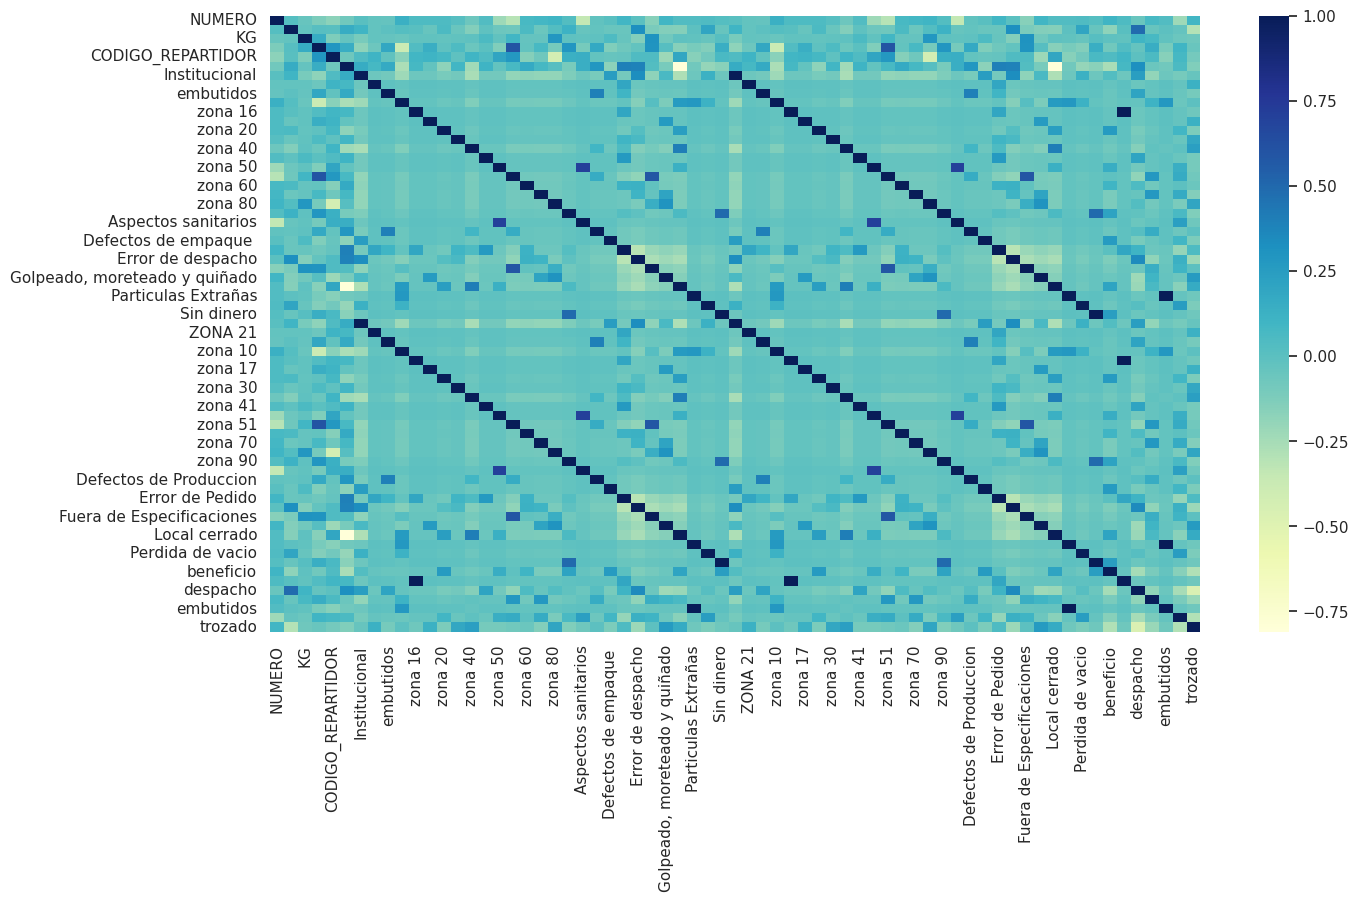

In [100]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos_na.corr(numeric_only=True), annot= False, cmap='YlGnBu')